# Anomaly Detection

#### Dataset

Dataset berisi transaksi yang dilakukan dengan kartu kredit pada bulan September 2013 oleh pemegang kartu Eropa.
Dataset ini menyajikan transaksi yang terjadi dalam dua hari, dimana kami memiliki 492 penipuan dari 284.807 transaksi. Dataset sangat tidak seimbang, kelas positif (penipuan) menyumbang 0,172% dari semua transaksi.

#### Sumber dataset

Dataset berasal dari kaggle dengan link : https://www.kaggle.com/mlg-ulb/creditcardfraud
        
#### Objectivitas

melakukan anomaly detection pada transaksi kartu kredit


#### Features Atribute

* Time = Jumlah detik berlalu antara transaksi saat ini dan transaksi pertama dalam kumpulan data
* V1 - V28 = hasil dari pengurangan Dimensi PCA untuk melindungi identitas pengguna dan fitur sensitif (v1-v28)
* Amount = Nilai Transaksi
* Class = 1 untuk transaksi penipuan, 0 sebaliknya

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

# Data loading

In [4]:
data = pd.read_csv('/content/drive/MyDrive/dataset/creditcard.csv')

In [5]:
data['Time'].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.55380e+05,
       1.55381e+05, 1.55382e+05])

#### melihat data teratas

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


#### melihat data terbawah

In [7]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251525,155380.0,-0.747520,1.527817,-1.041537,-0.284525,0.278937,-0.207860,-0.780236,-2.146115,-0.402847,-1.866892,0.242160,0.298047,-1.330266,-0.747545,-1.575914,0.751451,1.115591,1.095177,-0.071472,0.333686,-1.149728,0.748130,-0.005463,-0.454463,-0.228082,0.552758,-0.136165,0.023129,1.00,0.0
251526,155380.0,2.018155,0.078217,-1.613722,0.350389,0.340054,-0.674645,0.055148,-0.074942,0.292296,-0.195943,1.218612,0.648258,-0.521039,-0.543410,-0.457574,0.480179,0.317583,0.184017,0.274886,-0.180484,-0.305854,-0.836125,0.355946,0.656998,-0.329132,0.144121,-0.069370,-0.039697,1.98,0.0
251527,155381.0,2.141543,-0.643542,-1.551417,-0.541024,-0.227185,-0.782443,-0.110821,-0.277358,-0.876108,1.064115,0.349943,0.624625,0.255654,0.416196,-0.933087,-1.512464,-0.325091,1.108690,-0.154885,-0.563918,-0.461418,-0.780095,0.198362,-0.408668,-0.149191,0.522654,-0.078874,-0.077166,24.90,0.0
251528,155381.0,2.012594,0.118106,-1.602917,0.346244,0.398444,-0.657123,0.106058,-0.114898,0.187606,-0.217641,1.336151,1.014807,0.168488,-0.679812,-0.532771,0.448275,0.278306,0.100132,0.269232,-0.129947,-0.296030,-0.781358,0.344908,0.676023,-0.306974,0.141477,-0.065459,-0.037670,5.12,0.0
251529,155382.0,1.890389,0.503584,-0.561930,3.917759,0.390490,-0.018780,0.235768,-0.174248,-0.804701,1.339050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### melihat informasi data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251530 entries, 0 to 251529
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    251530 non-null  float64
 1   V1      251530 non-null  float64
 2   V2      251530 non-null  float64
 3   V3      251530 non-null  float64
 4   V4      251530 non-null  float64
 5   V5      251530 non-null  float64
 6   V6      251530 non-null  float64
 7   V7      251530 non-null  float64
 8   V8      251530 non-null  float64
 9   V9      251530 non-null  float64
 10  V10     251530 non-null  float64
 11  V11     251529 non-null  float64
 12  V12     251529 non-null  float64
 13  V13     251529 non-null  float64
 14  V14     251529 non-null  float64
 15  V15     251529 non-null  float64
 16  V16     251529 non-null  float64
 17  V17     251529 non-null  float64
 18  V18     251529 non-null  float64
 19  V19     251529 non-null  float64
 20  V20     251529 non-null  float64
 21  V21     25

#### melihat statistika data

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,251530.000000,251530.000000,251530.000000,251530.000000,251530.000000,251530.000000,251530.000000,251530.000000,251530.000000,251530.000000,251530.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000
mean,85749.351111,-0.034002,-0.020665,0.096562,0.023274,-0.036526,0.017495,-0.015402,0.001973,0.000953,-0.000701,0.039032,-0.028260,0.004832,0.015906,0.024600,-0.001967,0.009237,-0.014155,-0.003430,0.004206,-0.001702,-0.010367,-0.005807,0.000823,0.020034,0.001185,-0.000686,0.000704,90.710894,0.001829
std,42979.562343,1.959458,1.668243,1.507049,1.415069,1.374912,1.326072,1.227026,1.192793,1.111549,1.086977,1.029173,1.030695,1.009864,0.964824,0.926807,0.883080,0.862645,0.842487,0.817976,0.781882,0.737841,0.716709,0.637017,0.606031,0.515627,0.485268,0.401372,0.332473,251.589089,0.042726
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,50465.250000,-0.934624,-0.609618,-0.724445,-0.838215,-0.726790,-0.748908,-0.565057,-0.201807,-0.654703,-0.526845,-0.722172,-0.435973,-0.655623,-0.405299,-0.564640,-0.474216,-0.467849,-0.510130,-0.469063,-0.207580,-0.225451,-0.534214,-0.164857,-0.350944,-0.293632,-0.330029,-0.070597,-0.050664,6.000000,0.000000
50%,77792.500000,-0.000299,0.059537,0.289769,0.012606,-0.093932,-0.251652,0.021629,0.028692,-0.058047,-0.091188,-0.000747,0.123619,-0.011962,0.059008,0.085960,0.063473,-0.052703,-0.017173,-0.001194,-0.056538,-0.030961,-0.000639,-0.017765,0.044764,0.050138,-0.059115,0.002225,0.013741,23.000000,0.000000
75%,128066.750000,1.267854,0.780824,1.098101,0.792038,0.567947,0.420188,0.548163,0.330133,0.607531,0.457773,0.788210,0.611636,0.671546,0.501317,0.689497,0.528392,0.406566,0.487329,0.465866,0.139872,0.177654,0.500172,0.136584,0.432522,0.364151,0.247344,0.088998,0.077664,79.900000,0.000000
max,155382.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


#### melihat columns

In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### melihat dimensi data

In [11]:
data.shape

(251530, 31)

data terdiri atas 31 columns dan 284807 rows

# Data Cleaning

#### melihat missing values

In [12]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

tidak terdapat missing values pada data

# Explorasi Data Analysis

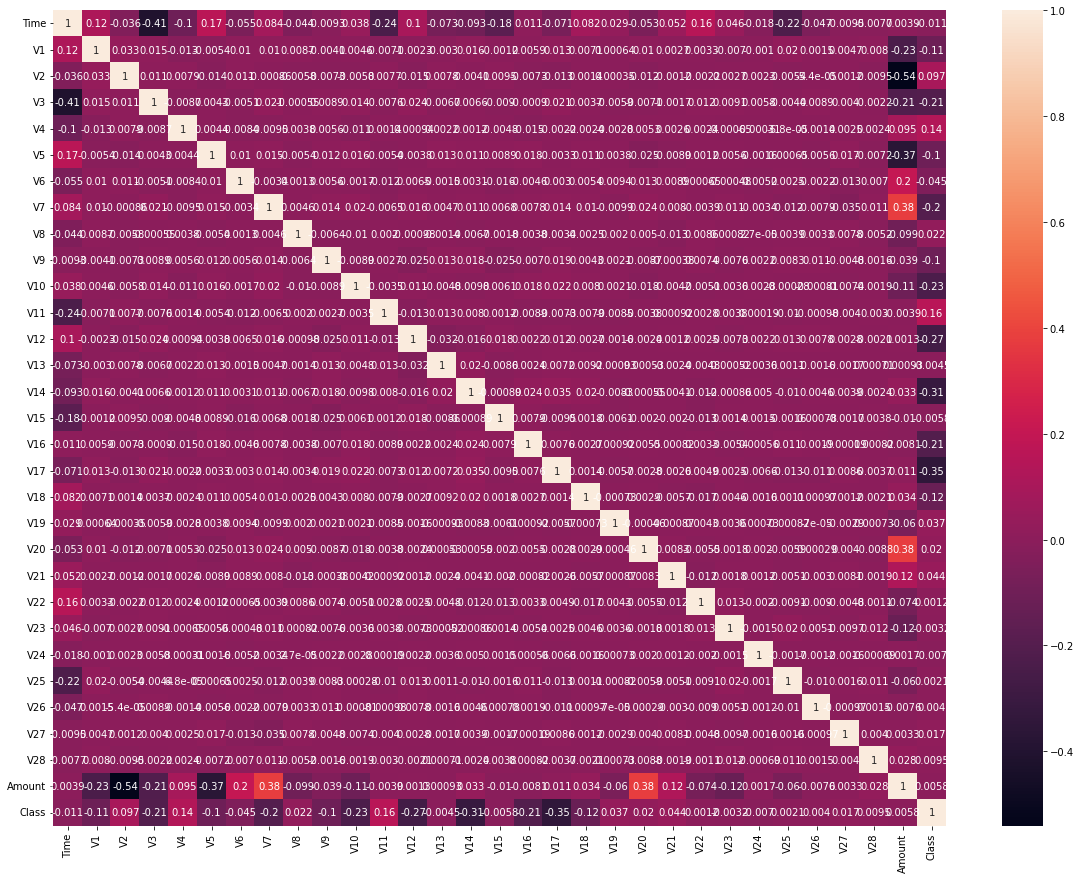

In [13]:
corr = data.corr()
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr, annot = True);

#### membuat query numerical features

In [14]:
not_v = ['Time', 'Amount','Class']

V_feat = data.drop(not_v, axis=1)
V_feat.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

#### Visualisasi  Class features

In [15]:
data['Class'].value_counts()

0.0    251069
1.0       460
Name: Class, dtype: int64

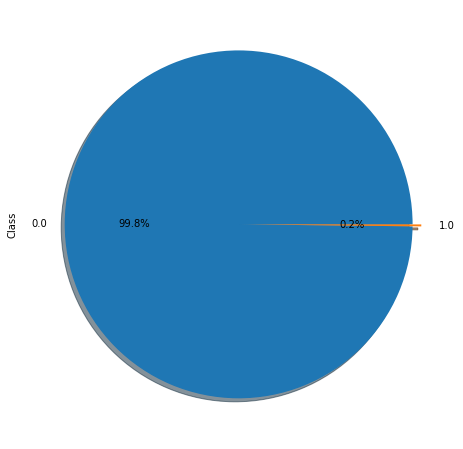

In [16]:
plt.figure(figsize=(8,8))
data['Class'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', shadow=True);

Dari visualisasi terlihat bahwa data penggunan kartu kredit yang terindikasi melakukan fraud terdapat 492 konsumen (0.2%)

#### Visualisasi hubungan waktu transaksi dengan kejadian fraud

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


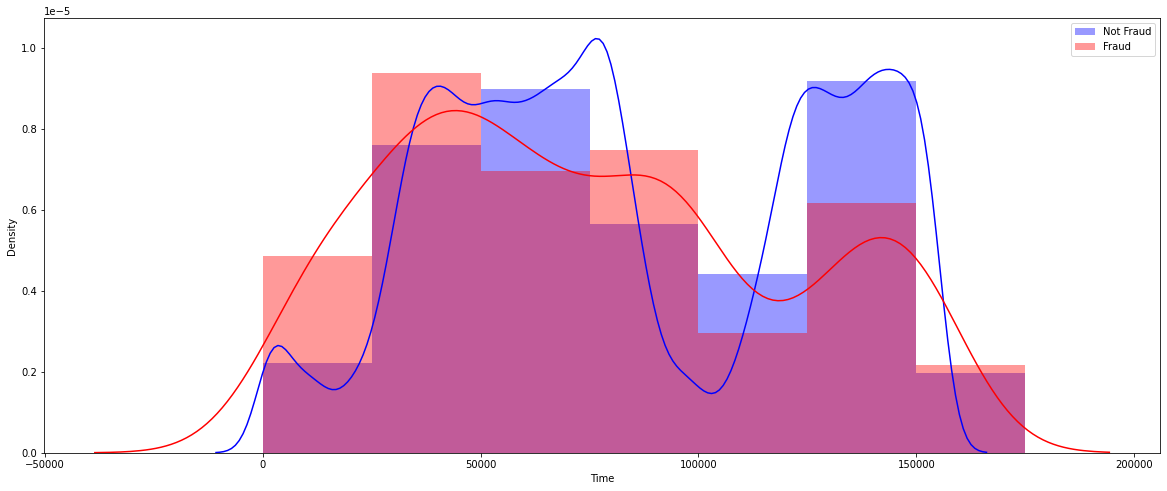

In [17]:
plt.figure(figsize=(20,8))
sns.distplot(data['Time'][data['Class'] == 0], bins=[0, 25000, 50000, 75000, 100000, 125000,150000, 175000], color='b', label='Not Fraud')
sns.distplot(data['Time'][data['Class'] == 1], bins=[0, 25000, 50000, 75000, 100000, 125000,150000, 175000], color='r', label='Fraud')
plt.legend();

dari visualisasi terlihat bahwa konsumen yang melakukan jarak transaksi saat ini dengan transaksi sebelumnya dengan rentang waktu 0 sampai dengan 50.000 detik dan rentang waktu 75.000 sampai dengan 100.000 terindikasi melakukan fraud kartu kredit 

#### visualisasi hubungan jumlah transaksi dengan kejadian fraud

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


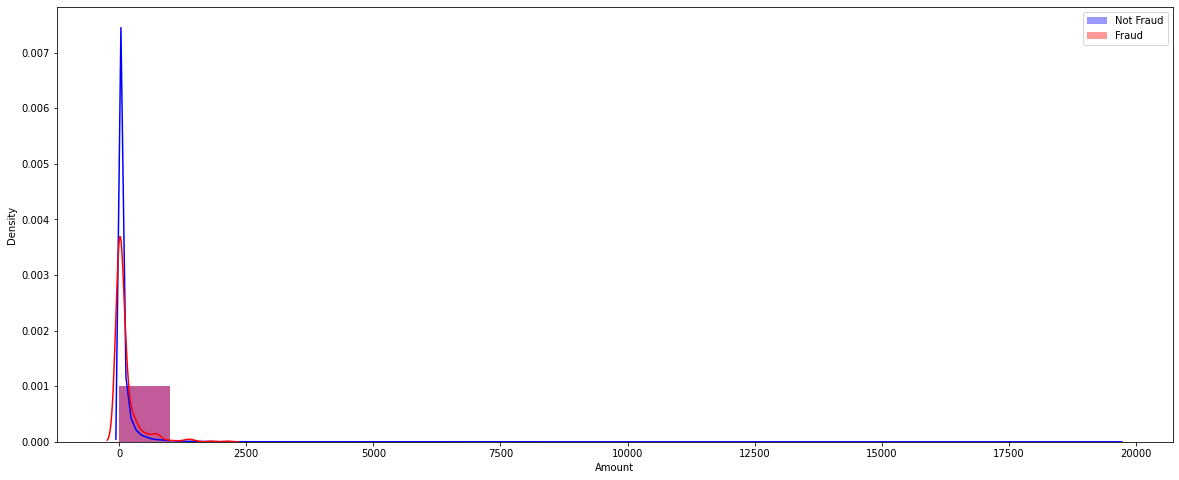

In [18]:
plt.figure(figsize=(20,8))
sns.distplot(data['Amount'][data['Class'] == 0], bins=[0, 1000], color='b', label='Not Fraud')
sns.distplot(data['Amount'][data['Class'] == 1], bins=[0, 1000], color='r', label='Fraud')
plt.legend();

Dari visualisasi terlihat bahwa nilai transaksi kartu kredit yang terindikasi melakukan fraud dibawa 500

#### melakukan visualisasi data V

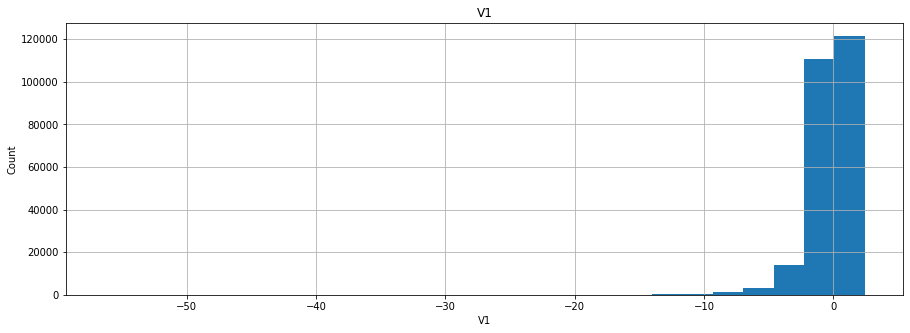

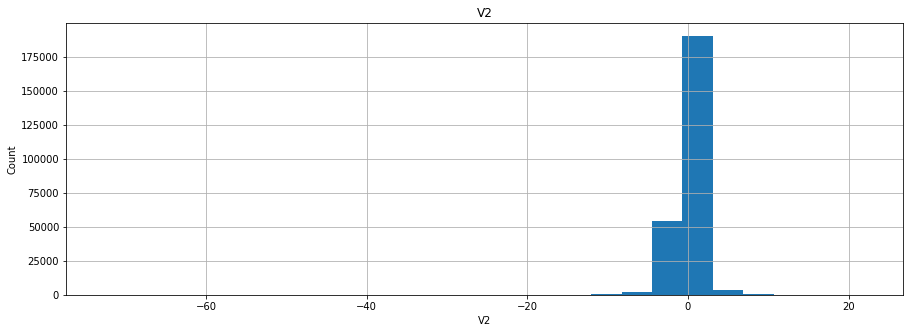

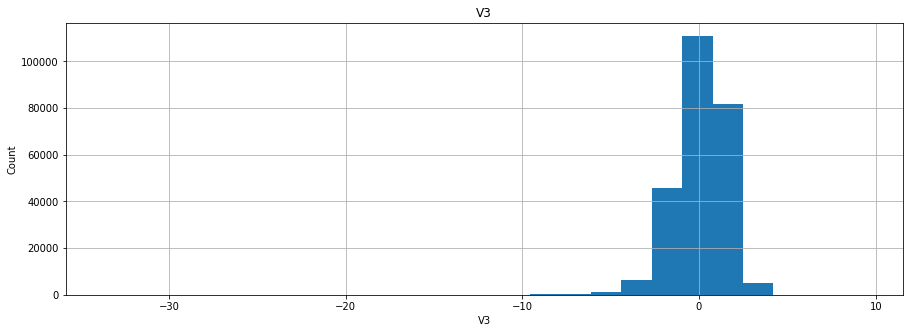

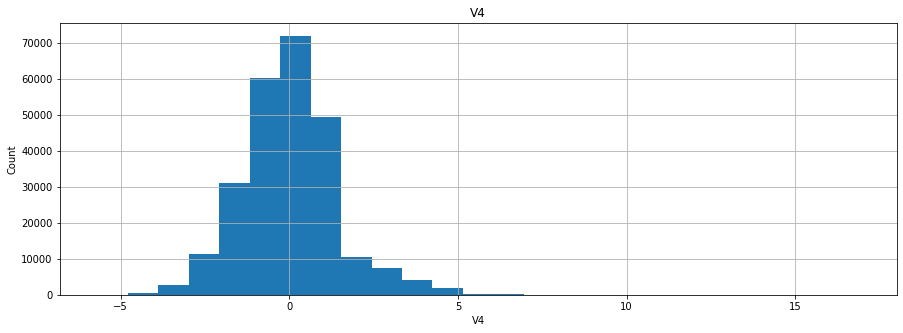

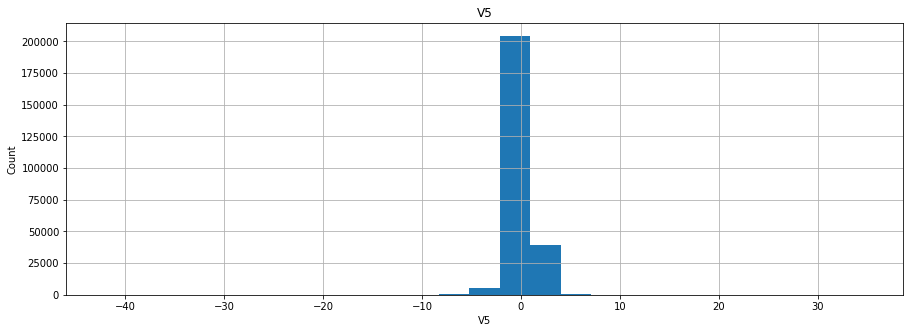

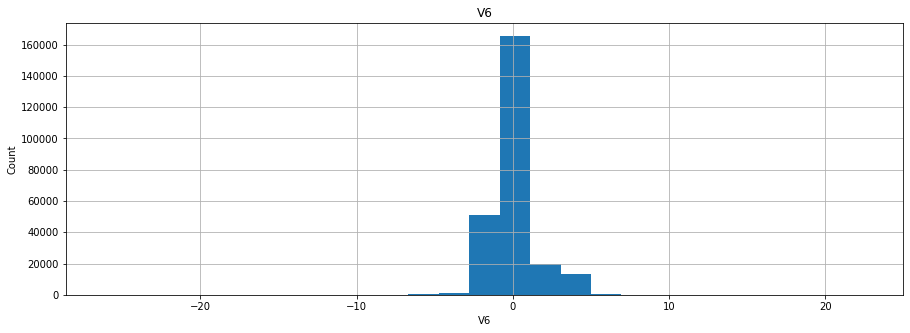

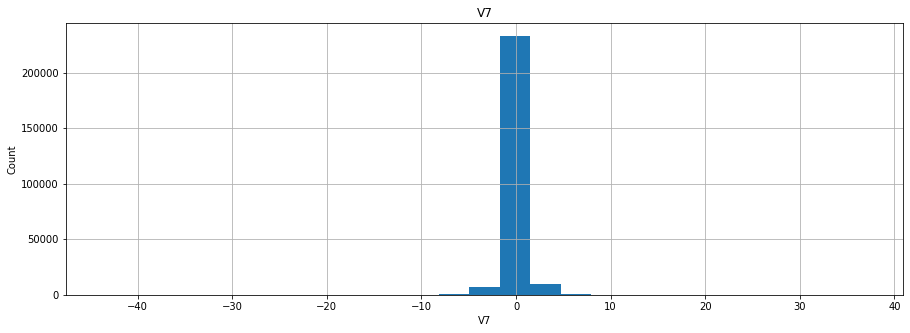

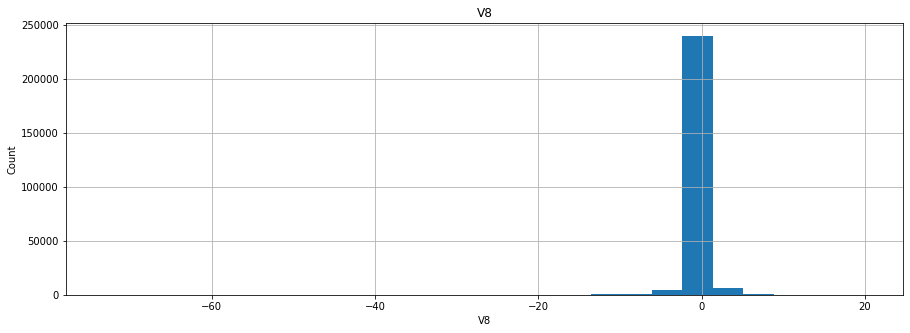

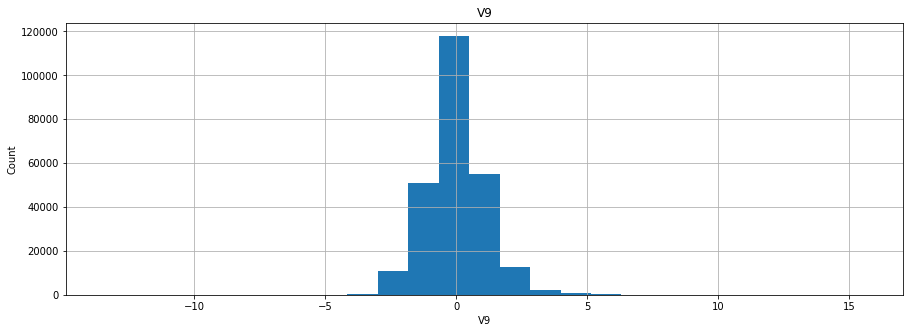

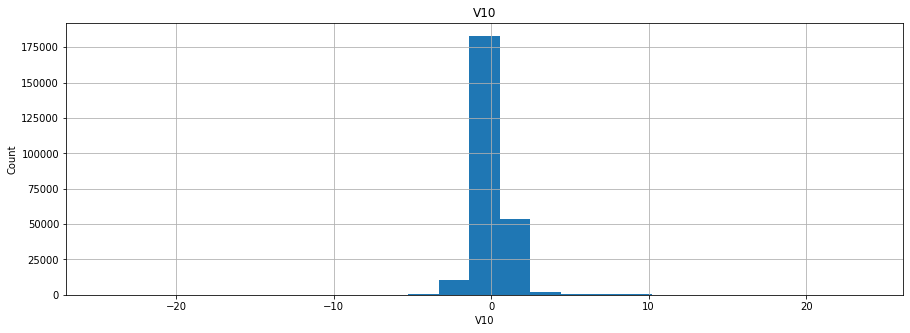

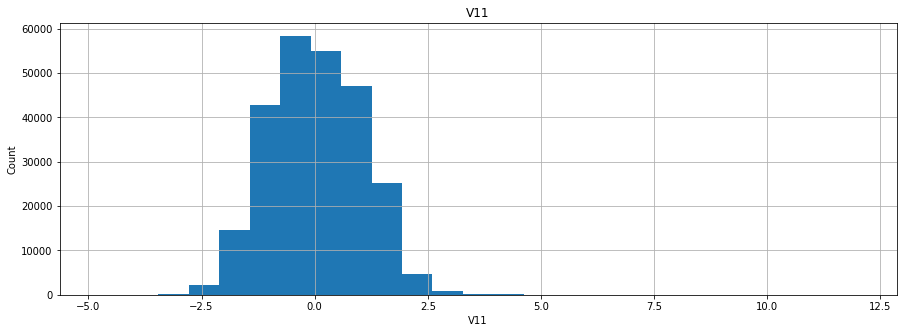

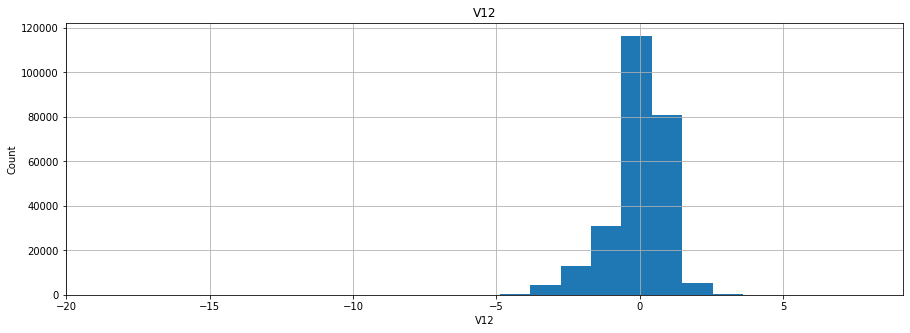

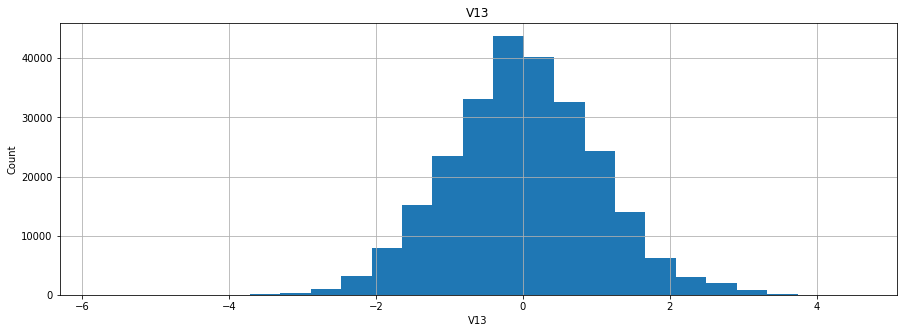

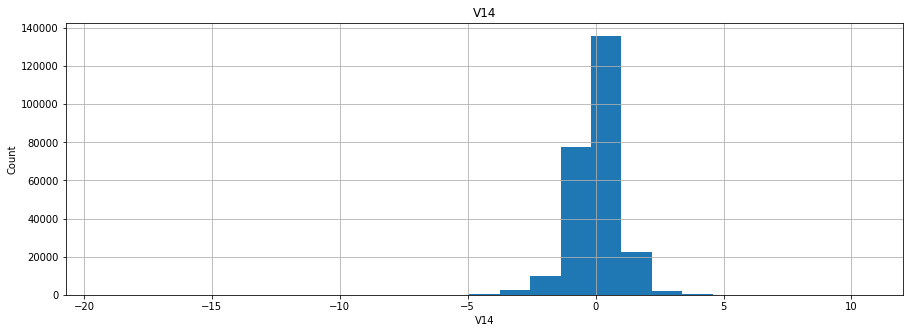

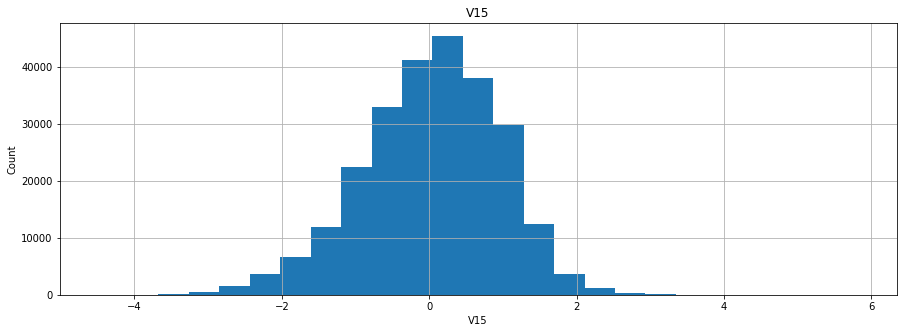

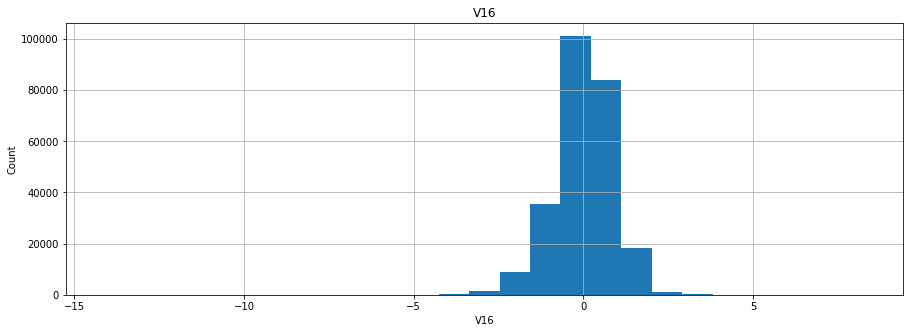

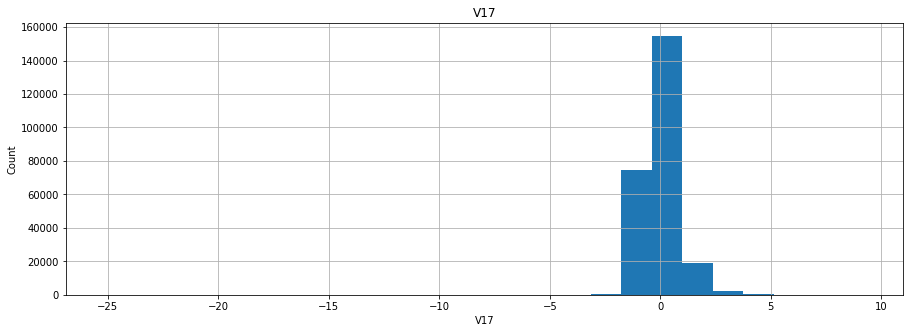

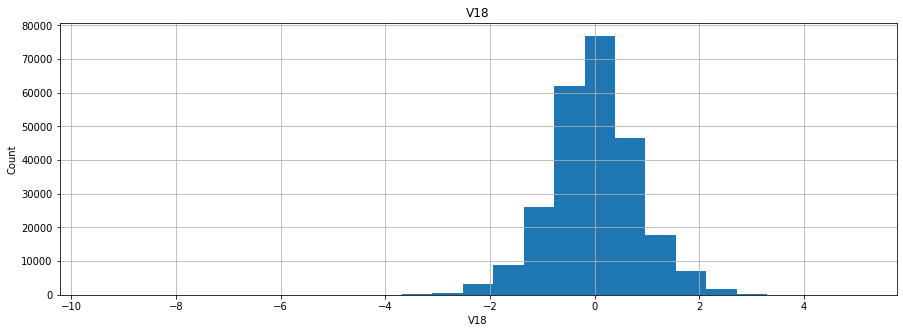

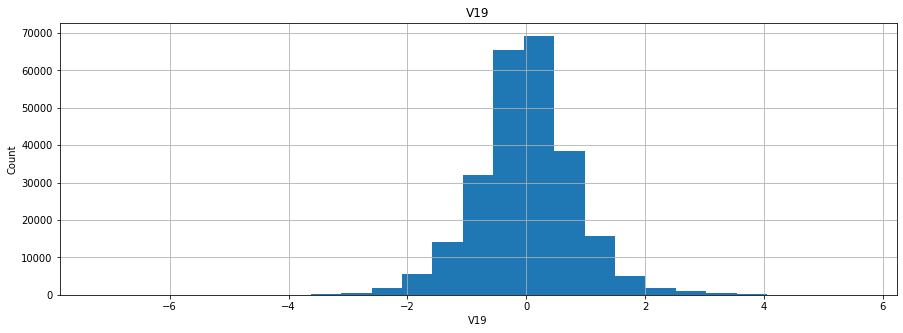

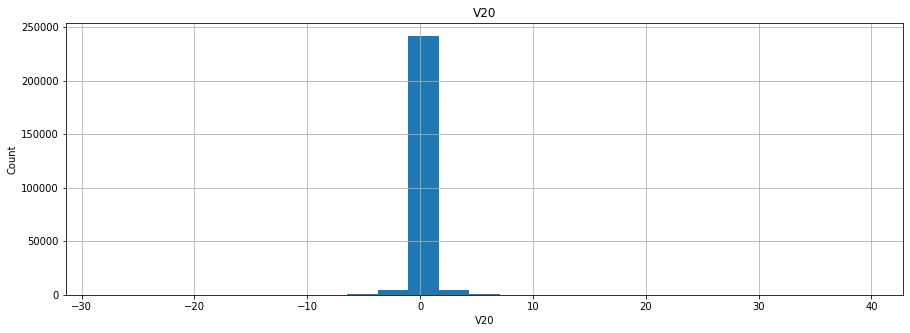

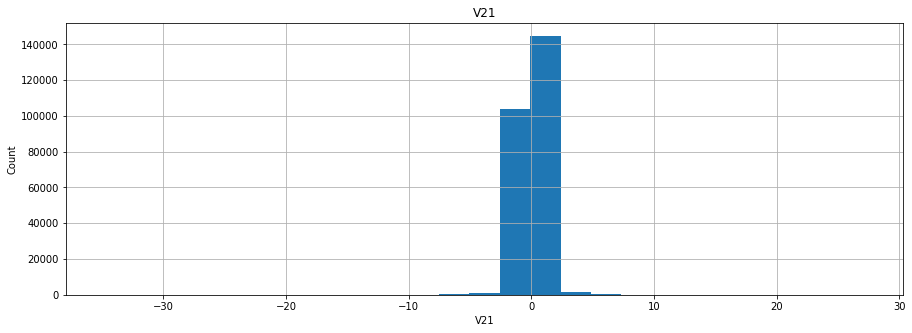

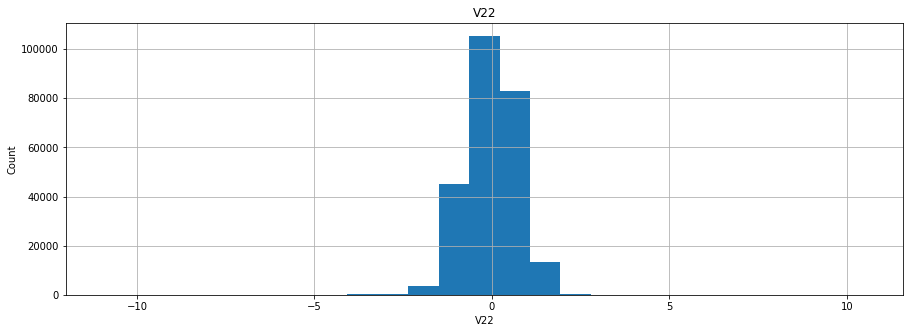

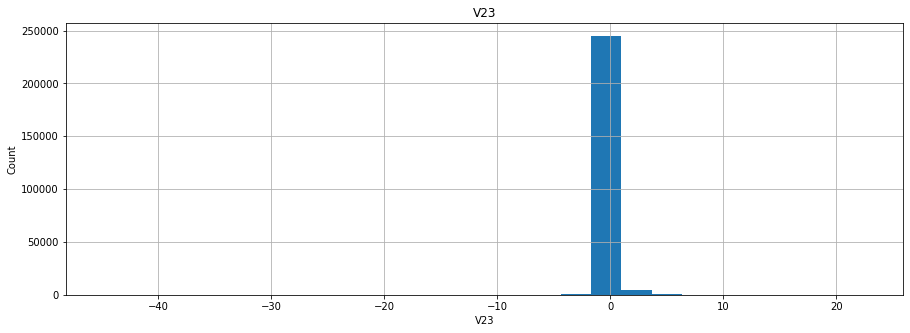

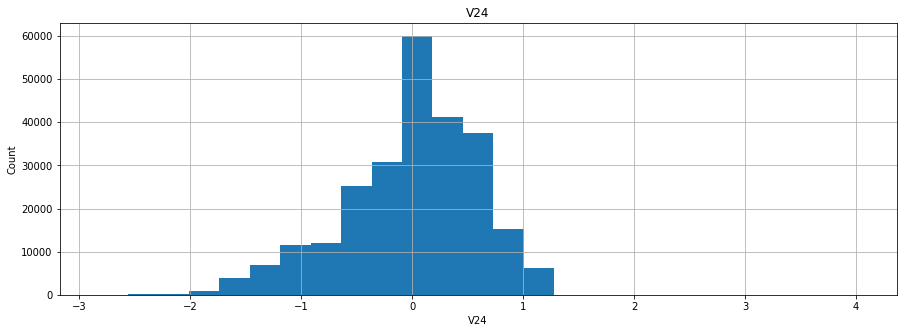

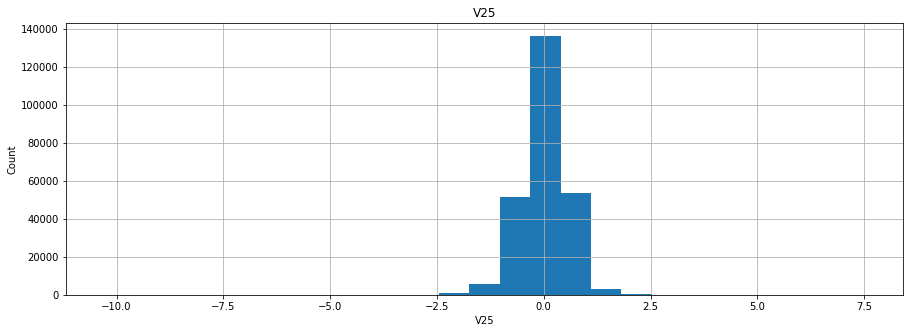

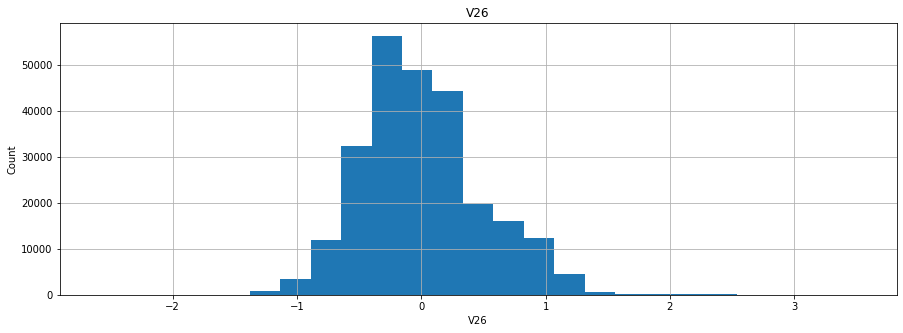

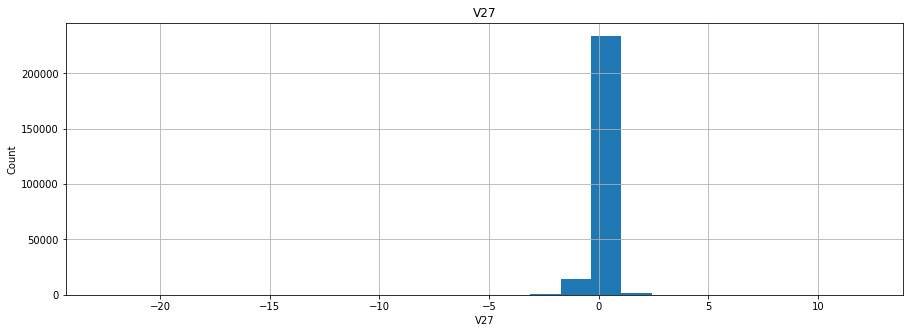

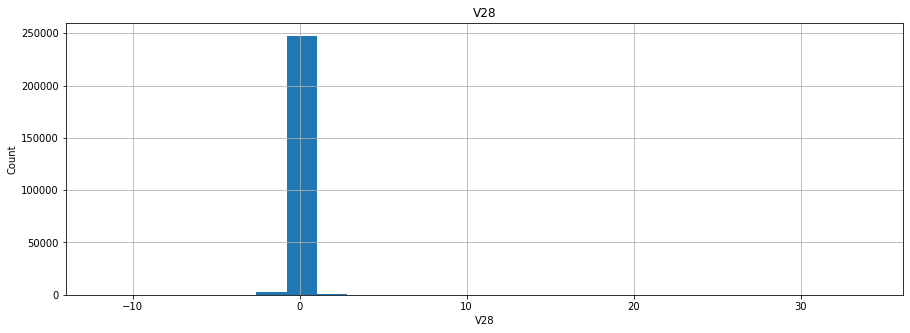

In [19]:
for feature in V_feat:
    dataset = data.copy()
    dataset[feature].hist(bins=25, figsize=(15,5))
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Analysis Explorasi Data Analysis

dari hasil visualisasi data diperoleh informasi sebagai berikut:
* Dari visualisasi terlihat bahwa konsumen yang melakukan jarak transaksi saat ini dengan transaksi sebelumnya dengan rentang waktu 0 sampai dengan 50.000 detik dan rentang waktu 75.000 sampai dengan 100.000 terindikasi melakukan fraud kartu kredit
* Dari visualisasi terlihat bahwa nilai transaksi kartu kredit yang terindikasi melakukan fraud dibawa 500

# Data Preprocessing

#### Mengatasi Missing Values

In [20]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [21]:
data.dropna(inplace=True)
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000
mean,85749.074274,-0.034009,-0.020667,0.096565,0.023259,-0.036528,0.017495,-0.015403,0.001974,0.000956,-0.000706,0.039032,-0.028260,0.004832,0.015906,0.024600,-0.001967,0.009237,-0.014155,-0.003430,0.004206,-0.001702,-0.010367,-0.005807,0.000823,0.020034,0.001185,-0.000686,0.000704,90.710894,0.001829
std,42979.423522,1.959458,1.668246,1.507051,1.415050,1.374915,1.326074,1.227028,1.192795,1.111551,1.086975,1.029173,1.030695,1.009864,0.964824,0.926807,0.883080,0.862645,0.842487,0.817976,0.781882,0.737841,0.716709,0.637017,0.606031,0.515627,0.485268,0.401372,0.332473,251.589089,0.042726
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,50465.000000,-0.934625,-0.609621,-0.724446,-0.838218,-0.726794,-0.748908,-0.565057,-0.201809,-0.654691,-0.526845,-0.722172,-0.435973,-0.655623,-0.405299,-0.564640,-0.474216,-0.467849,-0.510130,-0.469063,-0.207580,-0.225451,-0.534214,-0.164857,-0.350944,-0.293632,-0.330029,-0.070597,-0.050664,6.000000,0.000000
50%,77792.000000,-0.000312,0.059534,0.289791,0.012599,-0.093933,-0.251652,0.021625,0.028697,-0.058043,-0.091189,-0.000747,0.123619,-0.011962,0.059008,0.085960,0.063473,-0.052703,-0.017173,-0.001194,-0.056538,-0.030961,-0.000639,-0.017765,0.044764,0.050138,-0.059115,0.002225,0.013741,23.000000,0.000000
75%,128066.000000,1.267849,0.780825,1.098103,0.792033,0.567954,0.420188,0.548167,0.330135,0.607532,0.457769,0.788210,0.611636,0.671546,0.501317,0.689497,0.528392,0.406566,0.487329,0.465866,0.139872,0.177654,0.500172,0.136584,0.432522,0.364151,0.247344,0.088998,0.077664,79.900000,0.000000
max,155381.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


#### Melakukan proses binning Time 

In [23]:
data['Time'] = pd.cut(data['Time'], [-1, 0, 25000, 50000, 75000, 100000, 125000, 150000, 175000], labels=[1,2,3,4,5,6,7,8]).astype('int')

#### Melakukan proses binning Amount

In [24]:
data['Amount'] = pd.cut(data['Amount'], [-1, 0, 25, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000], labels=[1,2,3,4,5,6,7,8,9,10,11,12]).astype('int')

#### Melakukan proses binning V features

In [25]:
for feature in V_feat:
    data[feature] = pd.cut(data[feature], [-200.0 ,-100.0, -50.0 , -10.0, -5.0 , -3.0 , -0.0 , 3.0, 5.0, 10.0, 50.0, 100.0, 200.0 ], labels=[1,2,3,4,5,6,7,8,9,10,11,12]).astype('int')

proses binning dilakukan dengan mengelompokkan data numeric ke dalam bagian-bagian yang lebih kecil agar sebaran data lebih mudah dipahami

#### Melihat columns features setelah dilakukan binning

In [26]:
for col in data.columns:
    print(col,data[col].unique()[0:31], '\n')

Time [1 2 3 4 5 6 7 8] 

V1 [6 7 4 5 3 2] 

V2 [ 6  7  4  5  8  3  9 10  2] 

V3 [7 6 8 5 4 3 9] 

V4 [ 7  6  8  5  9 10  4] 

V5 [ 6  7  8  4  5  9  3 10] 

V6 [ 7  6  8  9  5 10  4  3] 

V7 [ 7  6  8  5  9 10  4  3] 

V8 [ 7  6  5  4  8  3  9 10  2] 

V9 [ 7  6  8  9  5 10  4  3] 

V10 [ 7  6  9  8  5 10  4  3] 

V11 [ 6  7  8  9 10  5] 

V12 [6 7 8 5 4 3 9] 

V13 [6 7 8 5 4] 

V14 [ 6  7  5  4  8  9  3 10] 

V15 [7 6 5 8 9] 

V16 [6 7 5 8 4 3 9] 

V17 [7 6 4 5 8 3 9] 

V18 [7 6 5 4 8 9] 

V19 [7 6 5 8 9 4] 

V20 [ 7  6  9  8  3  5  4 10] 

V21 [ 6  7  8  5  9 10  3  4] 

V22 [ 7  6  5  8  4  9  3 10] 

V23 [ 6  7  5  8  4 10  3  9] 

V24 [7 6 8] 

V25 [7 6 9 5 4 8 3] 

V26 [6 7 8] 

V27 [ 7  6  5  8  4  9 10  3] 

V28 [ 6  7  8  5  4  9 10  3] 

Amount [ 5  2  6  4  3  8  7  9  1 10 11] 

Class [0. 1.] 



In [27]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.00000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000,251529.000000
mean,4.944472,6.430201,6.508287,6.562102,6.527188,6.463652,6.443301,6.508963,6.514398,6.482088,6.449841,6.502634,6.551750,6.49644,6.526504,6.536014,6.529557,6.467942,6.489252,6.500857,6.416986,6.462225,6.498654,6.465449,6.555852,6.533497,6.461951,6.506896,6.579826,3.165086,0.001829
std,1.718338,0.660389,0.641369,0.573334,0.592909,0.582715,0.623212,0.568396,0.580453,0.533183,0.553359,0.508689,0.530661,0.50884,0.533236,0.503534,0.511650,0.521377,0.505257,0.507051,0.529725,0.533548,0.504117,0.521095,0.497647,0.499952,0.498679,0.507804,0.498812,1.530040,0.042726
min,1.000000,2.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,5.000000,3.000000,4.00000,3.000000,5.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,6.000000,3.000000,6.000000,3.000000,3.000000,1.000000,0.000000
25%,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,0.000000
50%,5.000000,6.000000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000,7.000000,6.00000,7.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,2.000000,0.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,4.000000,0.000000
max,8.000000,7.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,8.00000,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,8.000000,9.000000,8.000000,10.000000,10.000000,11.000000,1.000000


In [28]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Membuat dataset

In [29]:
col_to_use = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

dataset = data[col_to_use]
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

#### Menentukan variabel X

In [30]:
X = dataset

In [31]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1,6,6,7,7,6,7,7,7,7,7,6,6,6,6,7,6,7,7,7,7,6,7,6,7,7,6,7,6,5
1,1,7,7,7,7,7,6,6,7,6,6,7,7,7,6,7,7,6,6,6,6,6,6,7,6,7,7,6,7,2
2,2,6,6,7,7,6,7,7,7,6,7,7,7,7,6,7,6,7,6,6,7,7,7,7,6,6,6,6,6,6
3,2,6,6,7,6,6,7,7,7,6,6,6,7,7,6,6,6,6,7,6,6,6,7,6,6,7,6,7,7,5
4,2,6,7,7,7,6,7,7,6,7,7,6,7,7,6,7,6,6,6,7,7,6,7,6,7,6,7,7,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251524,8,6,7,7,6,7,7,7,7,7,6,6,7,7,6,6,7,6,7,7,7,7,7,6,6,6,7,7,7,2
251525,8,6,7,6,6,7,6,6,6,6,6,7,7,6,6,6,7,7,7,6,7,6,7,6,6,6,7,6,7,2
251526,8,7,7,6,7,7,6,7,6,7,6,7,7,6,6,6,7,7,7,7,6,6,6,7,7,6,7,6,6,2
251527,8,7,6,6,6,6,6,6,6,6,7,7,7,7,7,6,6,6,7,6,6,6,6,7,6,6,7,6,6,2


#### Melakukan normalisasi data

In [32]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(251529, 30)

# Pendefinisian dan Pelatihan Model

#### mendefinisikan dan melatih model GaussianMixture

In [33]:
model = GaussianMixture(n_components=2)

%time model.fit(X)

CPU times: user 8.25 s, sys: 2.79 s, total: 11 s
Wall time: 6 s


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

mendefininisikan model dengan menggunakan 2 parameter untuk farud dan non fraud

# Evaluasi Model

In [34]:
labels = model.predict(X)

In [35]:
dataset['Anomaly'] = labels
dataset['Anomaly'].value_counts()

1    132848
0    118681
Name: Anomaly, dtype: int64

#### Visualisasi Model GaussianMixture

In [36]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

In [37]:
# menggunakan threshold 0.03 
scores = model.score_samples(X)

thresh = np.quantile(scores, 0.03)
print(thresh)

index = np.where(scores <= thresh)
outliers = X_PCA[index]

-52.81321845192713


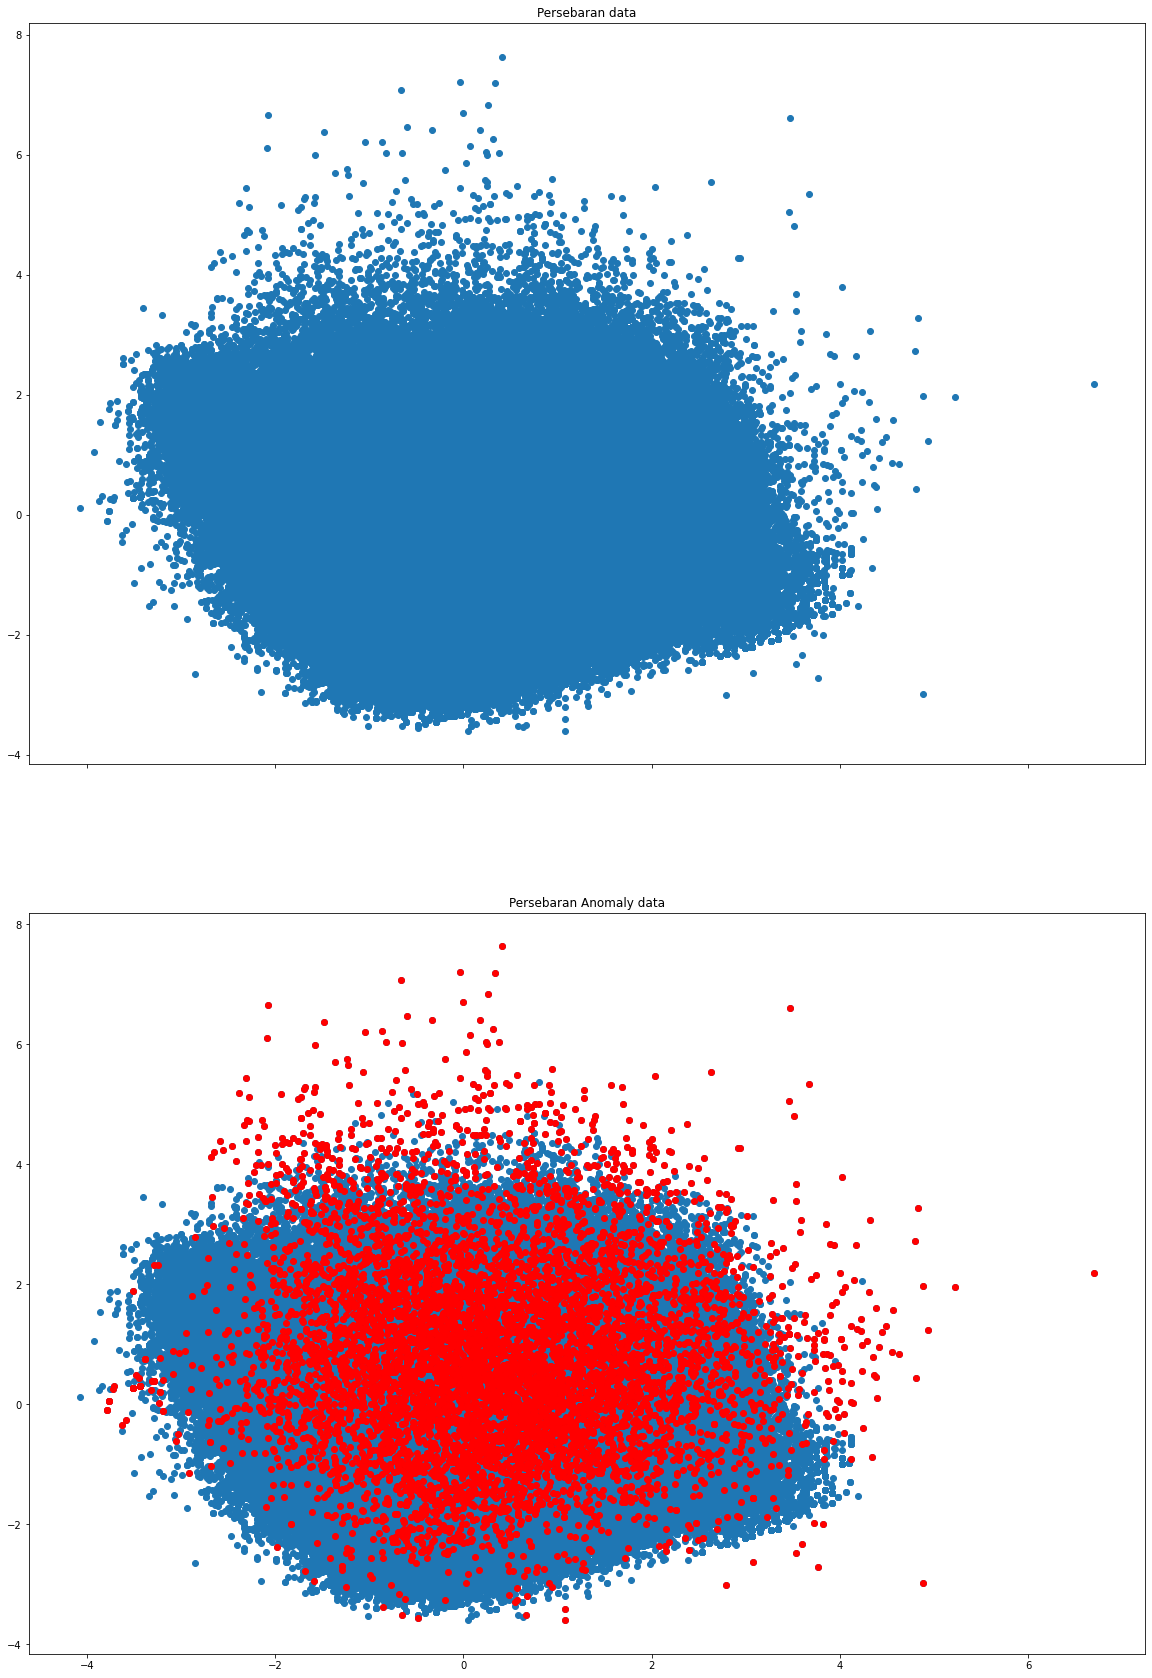

In [38]:
# Subplots of chol, age thalach
fig, (ax0,ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(20,30),
                              sharex=True
                              )

# add data to ax0
scatter = ax0.scatter(X_PCA[:, 0], X_PCA[:, 1]);

# customize ax0
ax0.set(title='Persebaran data');


# add data to ax1
scatter = ax1.scatter(X_PCA[:, 0], X_PCA[:,1]);
scatter = ax1.scatter(outliers[:,0],outliers[:,1], color='r');

# customize ax1
ax1.set(title='Persebaran Anomaly data');


# Model Inference

In [39]:
values_1 = [1, 1, 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1]
values_2 = [5, 1, 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 4]


In [40]:
values = [ values_1, values_2] 

In [41]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Anomaly'],
      dtype='object')

In [42]:
data_dummies = pd.DataFrame(values, columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [43]:
data_dummies

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4


In [47]:
prediction = model.predict(data_dummies)

print("Hasil prediksi model GaussianMixture Clustering: \n")
if prediction[0] == 0:
  print('Konsumen 1 termasuk dalam cluster Anomaly')
else: 
  print('Konsumen 1 termasuk dalam cluster Normal')

if prediction[1] == 0:
  print('Konsumen 2 termasuk dalam cluster Anomaly')
else: 
  print('Konsumen 2 termasuk dalam cluster Normal')

Hasil prediksi model GaussianMixture Clustering: 

Konsumen 1 termasuk dalam cluster Normal
Konsumen 2 termasuk dalam cluster Anomaly


#### Penjelasan Anomaly data

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

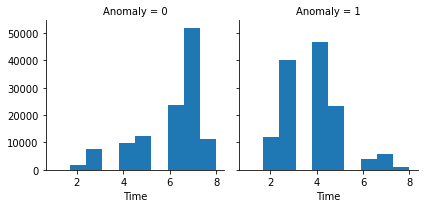

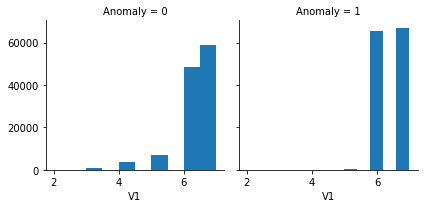

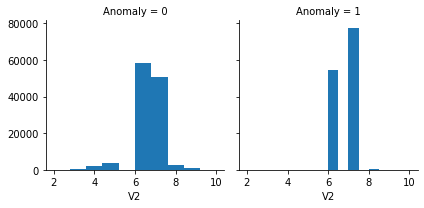

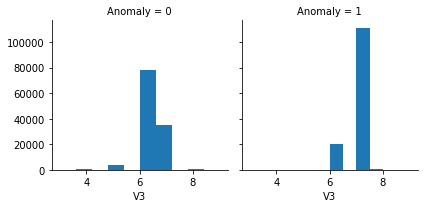

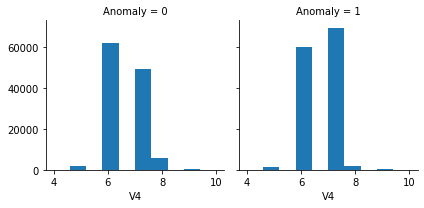

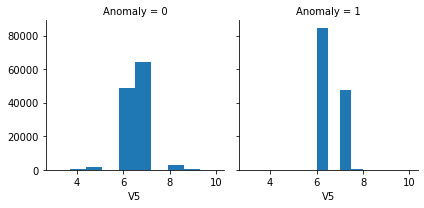

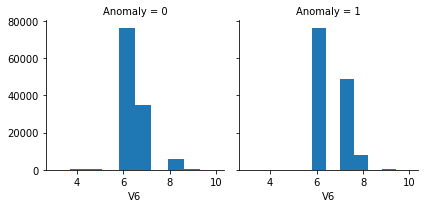

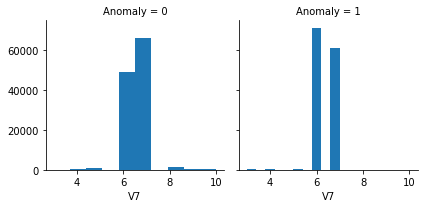

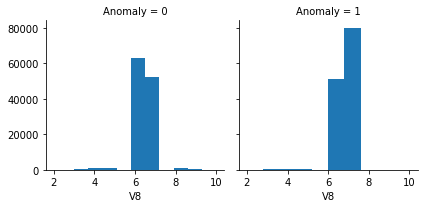

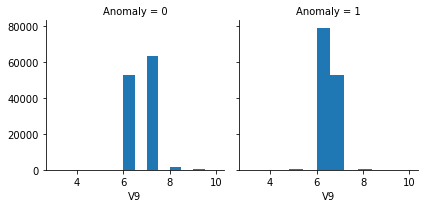

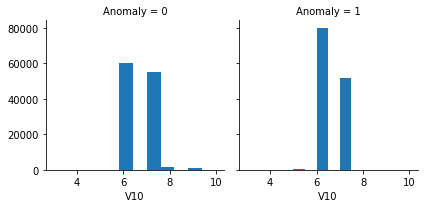

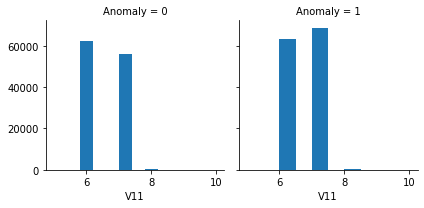

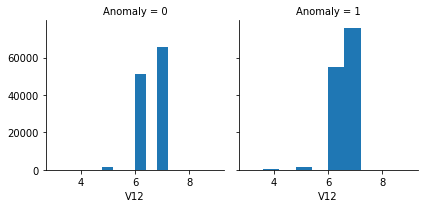

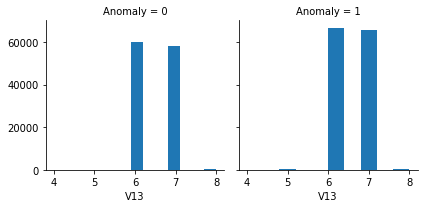

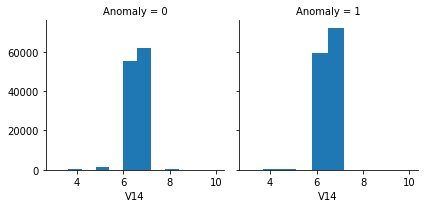

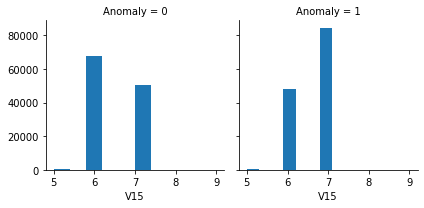

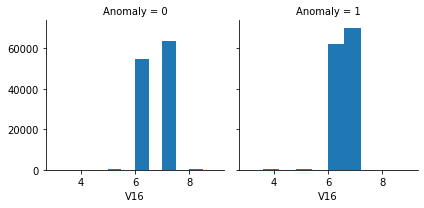

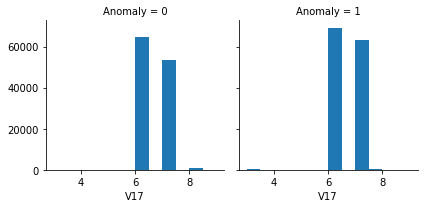

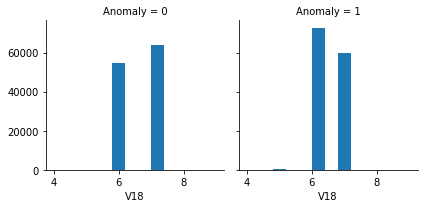

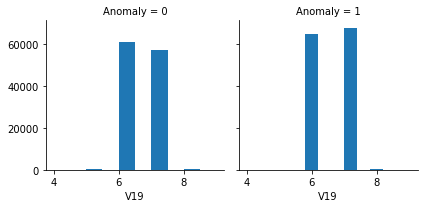

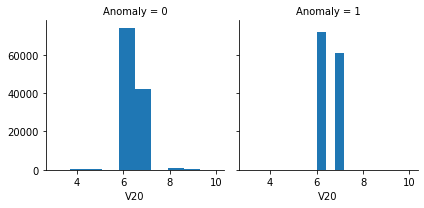

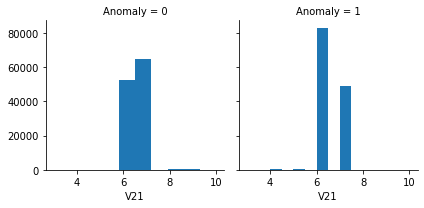

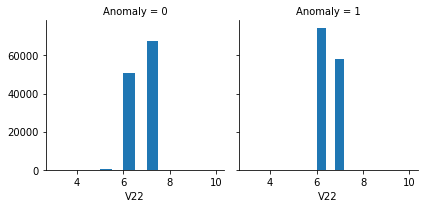

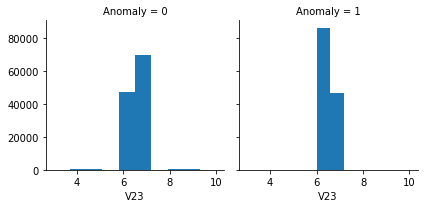

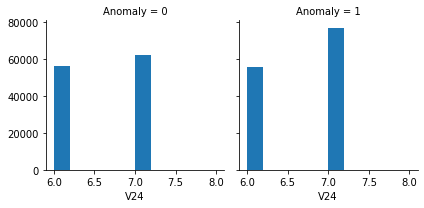

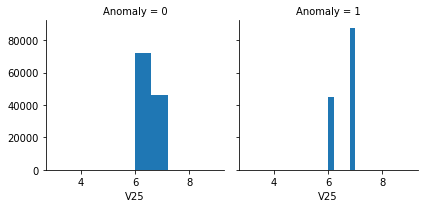

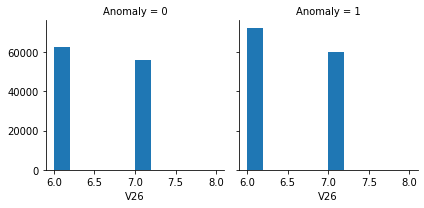

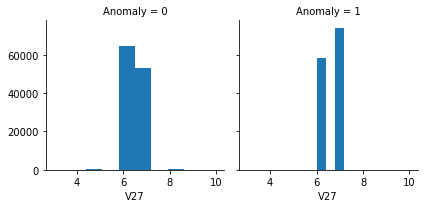

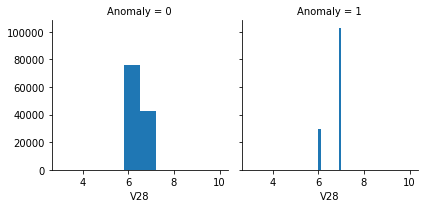

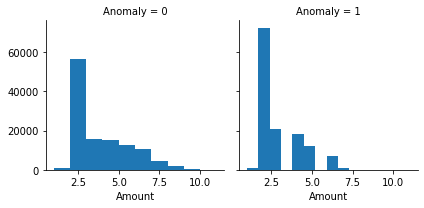

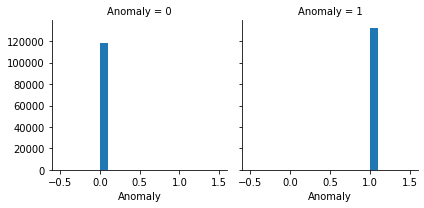

In [45]:
for col in dataset:
    grid = sns.FacetGrid(dataset, col='Anomaly')
    grid.map(plt.hist, col)

Penjelasan Anomaly:

* Cluster Anomaly 0 adalah Konsumen yang melakukan transaksi kartu kredit tinggi pada saat tertentu

* Cluster Anomaly 1 adalah Konsumen melakukan transaksi kartu kredit secara normal atau transaksinya relatif merata